In [11]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import itertools

In [3]:
# Load the data
data = pd.read_csv('data.csv')

C:\Users\juanm\AppData\Local\Temp\ipykernel_20636\3970788758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['Tiempo_evento'] = (data_relevant['Fecha_fin_seguimiento']-data_relevant['Fecha_entrada']).dt.days


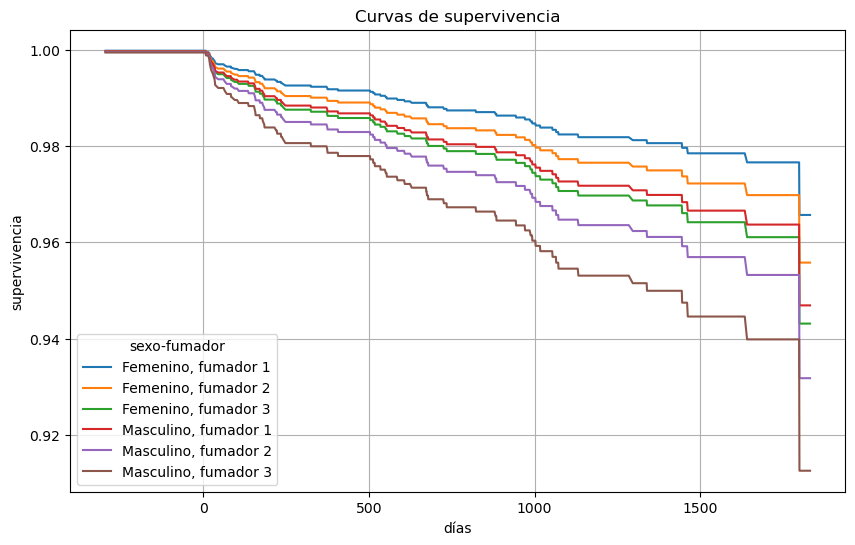

In [9]:
data['Fecha_entrada'] = pd.to_datetime(data['FOL_FechaEntrada'], errors='coerce')
data['Fecha_fin_seguimiento'] = pd.to_datetime(data['FOL_FechaEstadoVital'], errors='coerce')
data_relevant = data.dropna(subset=['Fecha_entrada', 'Fecha_fin_seguimiento'])
data_relevant['Tiempo_evento'] = (data_relevant['Fecha_fin_seguimiento']-data_relevant['Fecha_entrada']).dt.days

data_relevant_clean = data_relevant.dropna(subset=['Tiempo_evento', 'Muerte CV', 'MH_Sexo', 'MH_Edad', 'MH_IMC', 
                                                   'MH_Hipertension', 'MH_TratamientoDM', 'MH_Dislipemia', 
                                                   'MH_Fumador', 'MH_IRC', 'MH_HFdeC.isquemica', 'PSS_Alcohol'])
variables = ['Tiempo_evento', 'Muerte CV', 'MH_Sexo', 'MH_Edad', 'MH_IMC', 
                        'MH_Hipertension', 'MH_TratamientoDM', 'MH_Dislipemia', 
                        'MH_Fumador', 'MH_IRC', 'MH_HFdeC.isquemica', 'PSS_Alcohol']

# Modelo de Cox
cph = CoxPHFitter()
cph.fit(data_relevant_clean[variables], duration_col='Tiempo_evento', event_col='Muerte CV')

# curvas de supervivencia
plt.figure(figsize=(10, 6))
combinaciones = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
labels = ['Femenino, fumador 1', 'Femenino, fumador 2', 'Femenino, fumador 3',
          'Masculino, fumador 1', 'Masculino, fumador 2', 'Masculino, fumador 3']

for i, (sexo, fumador) in enumerate(combinaciones):
    df_pred = pd.DataFrame({
        'MH_Sexo': [sexo],
        'MH_Fumador': [fumador],
        'MH_Edad': [data_relevant_clean['MH_Edad'].mean()],
        'MH_IMC': [data_relevant_clean['MH_IMC'].mean()],
        'MH_Hipertension': [data_relevant_clean['MH_Hipertension'].mode()[0]],
        'MH_TratamientoDM': [data_relevant_clean['MH_TratamientoDM'].mode()[0]],
        'MH_Dislipemia': [data_relevant_clean['MH_Dislipemia'].mode()[0]],
        'MH_IRC': [data_relevant_clean['MH_IRC'].mode()[0]],
        'MH_HFdeC.isquemica': [data_relevant_clean['MH_HFdeC.isquemica'].mode()[0]],
        'PSS_Alcohol': [data_relevant_clean['PSS_Alcohol'].mode()[0]]
    })
    supervivencia = cph.predict_survival_function(df_pred)
    plt.plot(supervivencia.index, supervivencia.iloc[:, 0], label=labels[i])
plt.title('Curvas de supervivencia')
plt.xlabel('días')
plt.ylabel('supervivencia')
plt.legend(title='sexo-fumador')
plt.grid(True)
plt.show()